In [1]:
# 1. Load data and libraries
import pandas as pd
import numpy as np

# Way one
# from sklearn import model_selection
# model_selection.train_test_split()

from sklearn.model_selection import train_test_split
df=pd.read_csv("FZI_binned_wrangle.csv",encoding="UTF-8",low_memory=False)
df.info()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   GR             823 non-null    float64
 1   SP             823 non-null    float64
 2   CALX           823 non-null    float64
 3   RHOB           823 non-null    float64
 4   DPSS           823 non-null    float64
 5   NPSS           823 non-null    float64
 6   ILD            823 non-null    float64
 7   ILM            823 non-null    float64
 8   SFL            823 non-null    float64
 9   Binned_FZI_PS  823 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 64.4 KB


In [4]:
# 2. create input and target list

inputfeatures=['GR', 'SP', 'CALX', 'RHOB', 'DPSS', 'NPSS', 'ILD', 'ILM', 'SFL']
target = ['Binned_FZI_PS']
print(inputfeatures)

['GR', 'SP', 'CALX', 'RHOB', 'DPSS', 'NPSS', 'ILD', 'ILM', 'SFL']


In [5]:

X= df[inputfeatures]

y_= df[target]
print(y_)

# from sklearn import preprocessing
# le=preprocessing.LabelEncoder()
# le.fit(y_)
# y= le.transform(y_)
# print(y)

     Binned_FZI_PS
0                4
1                2
2                5
3                2
4                4
..             ...
818              2
819              3
820              3
821              2
822              3

[823 rows x 1 columns]


In [6]:
from sklearn.cluster import KMeans
km_um= KMeans(n_clusters=3, random_state=1)
km_um.fit(X)




KMeans(n_clusters=3, random_state=1)

In [7]:
from sklearn.cluster import DBSCAN
dbsc= DBSCAN(eps=0.5, min_samples=2)
dbsc.fit(X)
c_labels2=dbsc.labels_




In [8]:
c_labels2=dbsc.labels_
print(c_labels2)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15  0  1  2  3  4  5  6  7
  8  9 10 11 12 13 14 15 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1

In [9]:
c_labels=km_um.labels_
print(c_labels)

[1 1 0 0 1 2 2 2 2 2 2 2 2 1 1 0 1 1 0 0 1 2 2 2 2 2 2 2 2 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 1 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 2 2 2 1 0 0 0 0 0 0 2 2 1 1 2
 1 0 0 2 2 2 1 1 0 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 2 2 2 1 1 1 1 1 2 2 1 1 1
 1 1 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 2 2 2 2 1 1 1 1 1 0 2
 2 2 2 1 1 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 0 2 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 0 0 2 2 2 2 2 2 2 1 1 1 1 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 1
 0 0 0 0 0 1 2 1 1 1 2 1 1 1 1 1 0 2 0 1 1 1 1 1 2 2 1 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 1 1 1 1 2 2 2 2 2 2 2 1 2 2 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1
 2 2 1 0 1 1 1 0 0 1 1 1 

In [10]:
print(y_)

     Binned_FZI_PS
0                4
1                2
2                5
3                2
4                4
..             ...
818              2
819              3
820              3
821              2
822              3

[823 rows x 1 columns]


In [12]:
df_lbl=pd.DataFrame(c_labels,columns=["__CLUSTER_OUTPUT"])
print(df_lbl)
newdb= pd.concat([X,df_lbl],axis=1)

     __CLUSTER_OUTPUT
0                   1
1                   1
2                   0
3                   0
4                   1
..                ...
818                 1
819                 1
820                 1
821                 1
822                 1

[823 rows x 1 columns]


In [13]:
print(newdb)

        GR     SP    CALX     RHOB  DPSS  NPSS    ILD    ILM    SFL  \
0    46.32 -39.50  212.37  2378.71  0.17  0.31   4.24   4.24   5.89   
1    46.90 -42.00  212.85  2378.71  0.17  0.31   4.61   4.65   6.44   
2    55.67 -48.60  210.07  2405.00  0.14  0.36   6.26   6.38   7.16   
3    56.26 -50.40  206.31  2425.50  0.14  0.35   6.59   6.84   7.20   
4    56.96 -67.49  204.46  2312.50  0.23  0.25  14.71  19.37  19.28   
..     ...    ...     ...      ...   ...   ...    ...    ...    ...   
818  60.29 -26.40  193.63  2309.50  0.21  0.29  17.33  16.25  16.63   
819  63.97 -26.60  193.14  2298.50  0.21  0.28  16.47  16.02  16.40   
820  60.00 -26.10  192.65  2317.50  0.20  0.27  16.25  15.44  15.80   
821  59.11 -25.80  192.89  2322.00  0.20  0.27  16.10  15.09  15.51   
822  63.83 -24.79  195.38  2336.50  0.19  0.27  15.36  14.14  14.53   

     __CLUSTER_OUTPUT  
0                   1  
1                   1  
2                   0  
3                   0  
4                   1  
.. 

In [14]:
from sklearn import metrics

metrics.silhouette_score(X,c_labels, metric="euclidean")

0.2830589456930877

In [16]:
print(y_)
print(c_labels)

     Binned_FZI_PS
0                4
1                2
2                5
3                2
4                4
..             ...
818              2
819              3
820              3
821              2
822              3

[823 rows x 1 columns]
[1 1 0 0 1 2 2 2 2 2 2 2 2 1 1 0 1 1 0 0 1 2 2 2 2 2 2 2 2 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 1 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 2 2 2 1 0 0 0 0 0 0 2 2 1 1 2
 1 0 0 2 2 2 1 1 0 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 2 2 2 1 1 1 1 1 2 2 1 1 1
 1 1 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 2 2 2 2 1 1 1 1 1 0 2
 2 2 2 1 1 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 0 2 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 0 0 2 2 2 2 2 2 2 1 1 1 1 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 

In [17]:
from sklearn.metrics.cluster import fowlkes_mallows_score

scr1=fowlkes_mallows_score([0, 0, 1, 1], [0, 0, 1, 1])
print(scr1)


scr2=fowlkes_mallows_score([0, 0, 1, 0], [1, 1, 0, 1])
print(scr2)

scr2=fowlkes_mallows_score([0, 0, 1, 1], [1, 0, 0, 0])
print(scr2)

1.0
1.0
0.408248290463863


In [19]:
accuracy=fowlkes_mallows_score(y_,c_labels)

print(accuracy)


ValueError: labels_true must be 1D: shape is (823, 1)

In [21]:
from sklearn.metrics import accuracy_score

acs=accuracy_score(y_,c_labels)
print(acs)

0.07654921020656136


In [23]:
import matplotlib.pyplot as plt
print(c_labels)

import numpy as np
u_lbl= np.unique(c_labels)
print(u_lbl)




[1 1 0 0 1 2 2 2 2 2 2 2 2 1 1 0 1 1 0 0 1 2 2 2 2 2 2 2 2 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 1 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 2 2 2 1 0 0 0 0 0 0 2 2 1 1 2
 1 0 0 2 2 2 1 1 0 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 2 2 2 1 1 1 1 1 2 2 1 1 1
 1 1 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 2 2 2 2 1 1 1 1 1 0 2
 2 2 2 1 1 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 0 2 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 0 0 2 2 2 2 2 2 2 1 1 1 1 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 1
 0 0 0 0 0 1 2 1 1 1 2 1 1 1 1 1 0 2 0 1 1 1 1 1 2 2 1 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 1 1 1 1 2 2 2 2 2 2 2 1 2 2 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1
 2 2 1 0 1 1 1 0 0 1 1 1 

['GR', 'SP', 'CALX', 'RHOB', 'DPSS', 'NPSS', 'ILD', 'ILM', 'SFL']
[[ 6.31384706e+01 -3.89528235e+01  2.04890569e+02  2.44303482e+03
   1.27294118e-01  2.84862745e-01  1.37812157e+01  1.43783922e+01
   1.67496863e+01]
 [ 5.98507388e+01 -2.32913193e+01  2.05236214e+02  2.35004528e+03
   1.82005277e-01  2.86622691e-01  1.47230607e+01  1.46850132e+01
   1.73971768e+01]
 [ 4.07312698e+01 -5.81891534e+01  1.99387169e+02  2.25508217e+03
   2.37407407e-01  2.78412698e-01  2.97294180e+01  3.30736508e+01
   4.81234392e+01]]


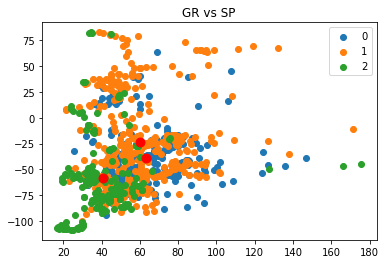

In [27]:
inputfeatures=['GR', 'SP', 'CALX', 'RHOB', 'DPSS', 'NPSS', 'ILD', 'ILM', 'SFL']
print(inputfeatures)

my_cent=km_um.cluster_centers_
print(my_cent)

for i in u_lbl:
    plt.scatter(X.iloc[c_labels==i,0],X.iloc[c_labels==i,1], label=i)

plt.scatter(my_cent[:,0],my_cent[:,1],s=80, color="r")
plt.title("GR vs SP")
plt.legend()
plt.show()

[[ 6.31384706e+01 -3.89528235e+01  2.04890569e+02  2.44303482e+03
   1.27294118e-01  2.84862745e-01  1.37812157e+01  1.43783922e+01
   1.67496863e+01]
 [ 5.98507388e+01 -2.32913193e+01  2.05236214e+02  2.35004528e+03
   1.82005277e-01  2.86622691e-01  1.47230607e+01  1.46850132e+01
   1.73971768e+01]
 [ 4.07312698e+01 -5.81891534e+01  1.99387169e+02  2.25508217e+03
   2.37407407e-01  2.78412698e-01  2.97294180e+01  3.30736508e+01
   4.81234392e+01]]


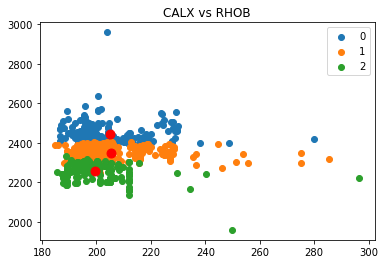

In [28]:
inputfeatures=['GR', 'SP', 'CALX', 'RHOB', 'DPSS', 'NPSS', 'ILD', 'ILM', 'SFL']
my_cent=km_um.cluster_centers_
print(my_cent)

for i in u_lbl:
    plt.scatter(X.iloc[c_labels==i,2],X.iloc[c_labels==i,3], label=i)

plt.scatter(my_cent[:,2],my_cent[:,3],s=80, color="r")
plt.title("CALX vs RHOB")
plt.legend()
plt.show()

[[ 6.31384706e+01 -3.89528235e+01  2.04890569e+02  2.44303482e+03
   1.27294118e-01  2.84862745e-01  1.37812157e+01  1.43783922e+01
   1.67496863e+01]
 [ 5.98507388e+01 -2.32913193e+01  2.05236214e+02  2.35004528e+03
   1.82005277e-01  2.86622691e-01  1.47230607e+01  1.46850132e+01
   1.73971768e+01]
 [ 4.07312698e+01 -5.81891534e+01  1.99387169e+02  2.25508217e+03
   2.37407407e-01  2.78412698e-01  2.97294180e+01  3.30736508e+01
   4.81234392e+01]]


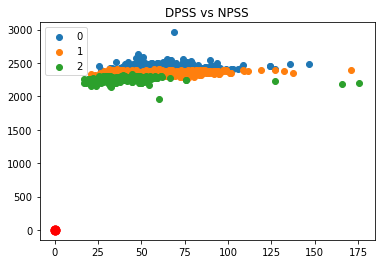

In [29]:
inputfeatures=['GR', 'SP', 'CALX', 'RHOB', 'DPSS', 'NPSS', 'ILD', 'ILM', 'SFL']

my_cent=km_um.cluster_centers_
print(my_cent)

for i in u_lbl:
    plt.scatter(X.iloc[c_labels==i,0],X.iloc[c_labels==i,3], label=i)

plt.scatter(my_cent[:,4],my_cent[:,5],s=80, color="r")
plt.title("DPSS vs NPSS")
plt.legend()
plt.show()

[[ 6.31384706e+01 -3.89528235e+01  2.04890569e+02  2.44303482e+03
   1.27294118e-01  2.84862745e-01  1.37812157e+01  1.43783922e+01
   1.67496863e+01]
 [ 5.98507388e+01 -2.32913193e+01  2.05236214e+02  2.35004528e+03
   1.82005277e-01  2.86622691e-01  1.47230607e+01  1.46850132e+01
   1.73971768e+01]
 [ 4.07312698e+01 -5.81891534e+01  1.99387169e+02  2.25508217e+03
   2.37407407e-01  2.78412698e-01  2.97294180e+01  3.30736508e+01
   4.81234392e+01]]


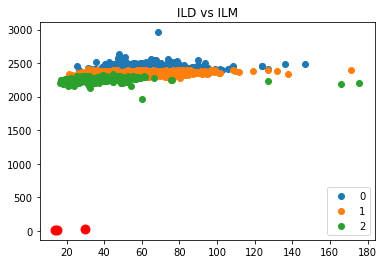

In [30]:
inputfeatures=['GR', 'SP', 'CALX', 'RHOB', 'DPSS', 'NPSS', 'ILD', 'ILM', 'SFL']
my_cent=km_um.cluster_centers_
print(my_cent)

for i in u_lbl:
    plt.scatter(X.iloc[c_labels==i,0],X.iloc[c_labels==i,3], label=i)

plt.scatter(my_cent[:,6],my_cent[:,7],s=80, color="r")
plt.title("ILD vs ILM")
plt.legend()
plt.show()